CO2 
Modeling Co2 in Mauna Lao, Hawaii

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import datetime

In [8]:
cd  /Users/nataliaerazo/Downloads

/Users/nataliaerazo/Downloads


In [9]:
ls *csv

Brian.csv                         exaplepython.csv
CoreEM09GC01.csv                  fldav_ljo.csv
Species-Arsenic-Data.csv          growth-raw.csv
TrichoIDs-2.csv                   lao.csv
TrichoIDs-3.csv                   twoD1.csv
TrichoIDs.csv                     weekly_in_situ_co2_mlo.csv
Trichodiv_heatmap_newmapfile.csv  well_data.csv


In [10]:
lao=pd.read_csv('lao.csv')

In [11]:
lao=pd.read_csv('lao.csv',usecols=[0,1],index_col='date',parse_dates=True)
print lao.info() #create a datetime index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982 entries, 1958-03-29 to 2016-09-24
Data columns (total 1 columns):
co2    2982 non-null float64
dtypes: float64(1)
memory usage: 46.6 KB
None


/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


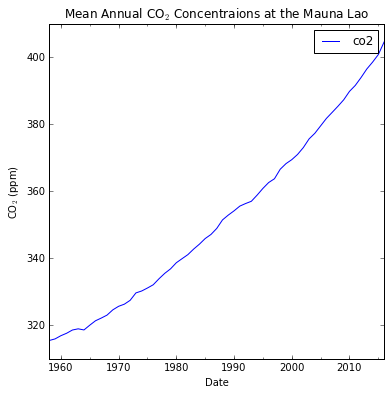

In [12]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
lao.resample('A',how=np.mean).plot(ax=ax)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Date')
ax.set_title('Mean Annual CO$_2$ Concentraions at the Mauna Lao')

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


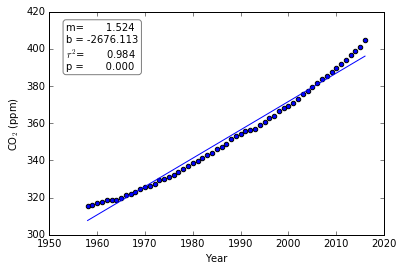

In [15]:
fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)
ax.scatter(x,y)

results=stats.linregress(x,y)
ax.plot(x,results[0]*x+results[1])
textstr='m={:>12.3f}\nb ={:>10.3f}\n$r^2$={:>12.3f}\np ={:>12.3f}'.format(results[0],results[1],results[2]**2,results[3])
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10,verticalalignment='top',bbox=props)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


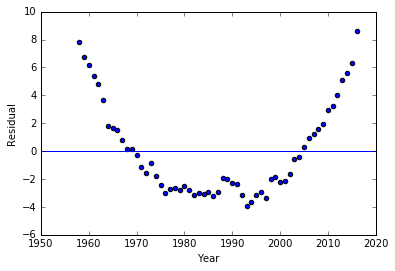

In [16]:
fig,ax=plt.subplots()

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

results=stats.linregress(x,y)
ax.scatter(x,y-(results[0]*x+results[1]))
ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


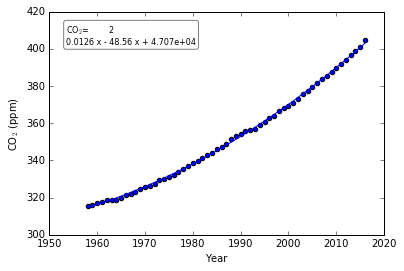

In [50]:
fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(x.min(),x.max())  #set the range using the data
a=np.polyfit(x,y,fit_order)  #I just copied from above to have in the same cell
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

textstr='CO$_2$={}'.format(polynominal)
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


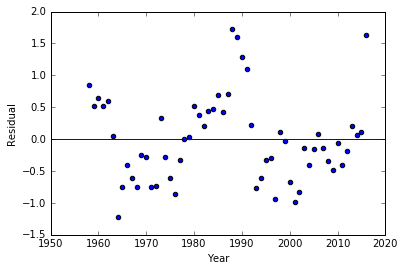

In [51]:
fit_order=2

fig,ax=plt.subplots()

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(x.min(),x.max())  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)

ax.scatter(x,y-polynominal(x))

ax.set_ylabel('Residual')
ax.set_xlabel('Year')
ax.axhline(y=0)

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


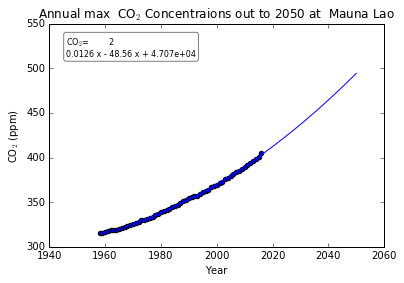

In [13]:
fit_order=2

fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

x=lao.co2.resample('A',how=np.mean).index.year
y=lao.co2.resample('A',how=np.mean)

x_fit=np.linspace(1970,2050)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')
ax.set_title('Annual max  CO$_2$ Concentraions out to 2050 at  Mauna Lao')

textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)

Figure 1 (). Annual  max CO2 out to 2050 at Mauna Lao 

In [72]:
print lao.co2.resample('M',how=np.mean).head()

date
1958-03-31    316.1900
1958-04-30    317.2650
1958-05-31    317.5000
1958-06-30         NaN
1958-07-31    315.6875
Freq: M, Name: co2, dtype: float64


/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


In [34]:
lao['co2_mean']=pd.rolling_mean(lao.co2, 52)

/Users/nataliaerazo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52,center=False).mean()
  if __name__ == '__main__':


In [42]:
lao['month']=lao.index.month

In [14]:
grouper = pd.TimeGrouper("A")

In [15]:
lao['normed'] = lao.groupby(grouper).transform(lambda x: x-x.mean())
print lao.head()

               co2  normed
date                      
1958-03-29  316.19   0.716
1958-04-05  317.31   1.836
1958-04-12  317.69   2.216
1958-04-19  317.58   2.106
1958-04-26  316.48   1.006


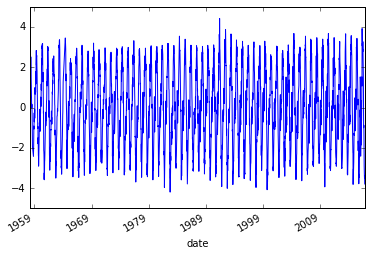

In [20]:
lao.normed.plot()

fig2. Changes of the mean in anual Co2 at M.Lao 

In [ ]:
lao['2000':'2016'].normed.plot()
x_label=('mean')

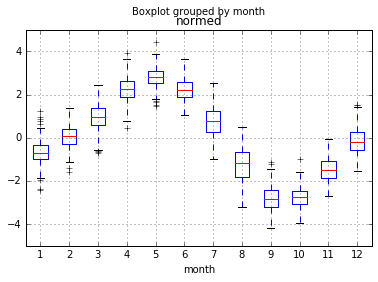

In [44]:
lao.boxplot(column='normed', by='month')

Fig3. Boxplots of Co2 ppm mean every month.

In [9]:
lao.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-17', '1958-05-24',
               '1958-07-05', '1958-07-12',
               ...
               '2016-07-23', '2016-07-30', '2016-08-06', '2016-08-13',
               '2016-08-20', '2016-08-27', '2016-09-03', '2016-09-10',
               '2016-09-17', '2016-09-24'],
              dtype='datetime64[ns]', name=u'date', length=2982, freq=None)

In [10]:
lao.index[0]

Timestamp('1958-03-29 00:00:00')

In [12]:
lao['elapsed'] = (lao.index.to_series() - lao.index.to_series()[0])/datetime.timedelta(days=365)

In [13]:
lao.head()

,co2,elapsed
date,,
1958-03-29,316.19,0.000000
1958-04-05,317.31,0.019178
1958-04-12,317.69,0.038356
1958-04-19,317.58,0.057534
1958-04-26,316.48,0.076712


In [14]:
lao.elapsed.dtype

dtype('float64')

In [15]:
lao['elapsed'] = (lao.index.to_series() - lao.index.to_series()[0])/datetime.timedelta(days=365)

In [16]:
lao.head()

,co2,elapsed
date,,
1958-03-29,316.19,0.000000
1958-04-05,317.31,0.019178
1958-04-12,317.69,0.038356
1958-04-19,317.58,0.057534
1958-04-26,316.48,0.076712


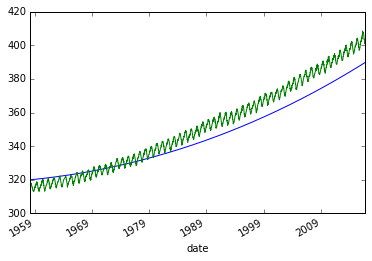

In [68]:
So=3.
R=.01
tau=120.0
Co=320
lao['S']=So*np.exp(R*lao.elapsed)
lao['C']=Co*np.exp(-lao.elapsed/tau)+(So/(R+1/tau))*(np.exp(R*lao.elapsed)-np.exp(-lao.elapsed/tau))
#lao.S.plot()
lao.C.plot()
lao.co2.plot()
#lao.plot(lao.C)
#lao.co2.plot()

Fig4. Model of Co2: Blue line shows the predicted Co2 ppm and red shows the meausrements.

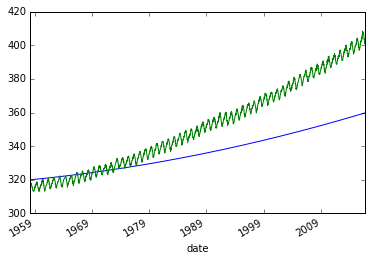

In [61]:
So=3.
R=.01/2
tau=120.0
Co=320
lao['S']=So*np.exp(R*lao.elapsed)
lao['C']=Co*np.exp(-lao.elapsed/tau)+(So/(R+1/tau))*(np.exp(R*lao.elapsed)-np.exp(-lao.elapsed/tau))
#lao.S.plot()
lao.C.plot()
lao.co2.plot()

Fig 5. Model of Co2 at R/2